In [1]:
from analytic_psfs import Mie_Theory
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

hbar_eVs = 6.58212E-16 # Planck's constant [eV*s]
c = 2.998E+10 # speed of light [cm/s]

In [2]:
probe = np.arange(400, 701)*1E-7
lmax=10
nb=1.5
radius=60.E-7
mt = Mie_Theory(radius=radius, nb=nb, selected_waves=probe)
abs_cross_MIE, sca_cross_MIE, _ = mt.cross_sects(nTOT=lmax)


In [3]:
rad_val = 60
mie_bem = loadmat(str('simulated_sphere_data/Sph')+str(rad_val)+str('nm_BEMMIE_l')+str(lmax)+str('_n')+str(nb)+'.mat')

mie_l1_wave = mie_bem['enei'][0]
mie_l1_ext = mie_bem['ext'][0]
mie_l1_sca = mie_bem['sca'][0]
mie_l1_abs = mie_l1_ext - mie_l1_sca


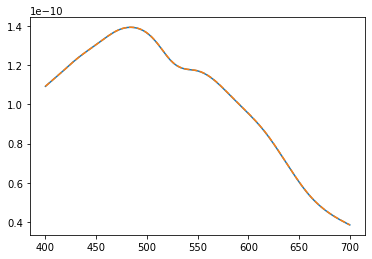

In [4]:
plt.plot(mie_l1_wave, mie_l1_abs)
plt.plot(probe*1E7, abs_cross_MIE,'--')

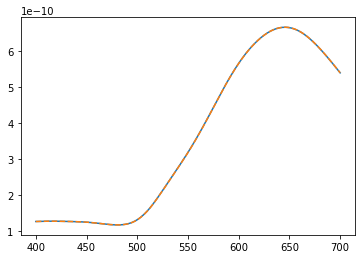

In [5]:
plt.plot(mie_l1_wave, mie_l1_sca)
plt.plot(probe*1E7, sca_cross_MIE,'--')